In [102]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [103]:
### Parameters

Vmax = 80 #max speed of traffic, in kilometers per hour
L = 11 #length of the road, in kilometers
rhomax = 250 #traffic density, in cars per kilometer
nx = 51
dx = 11/(nx - 1)
dt = 0.001
nt = 50
x = numpy.linspace(0, L, nx)
rhon = numpy.empty(nx)
t = 0

In [104]:
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50

In [105]:
import sympy

In [106]:
rho, t = sympy.symbols('rho t')
F = Vmax*rho*(1-rho/rhomax)
F

80*rho*(-rho/250 + 1)

In [107]:
rho = rho0
Fprime = Vmax - 2*rho*Vmax/rhomax

In [108]:
for n in range(nt):
    rhon = rho.copy()
    rho[1:] = rhon[1:] - Fprime[1:]*dt/dx*(rhon[1:]-rhon[:-1])
    
    rho[0] = rhon[0] - 73.6*dt/dx*(rhon[0]-rhon[-1])

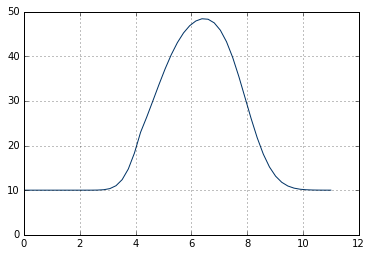

In [110]:
pyplot.plot(x, rho, color='#003366')
pyplot.ylim(0, 50);
pyplot.grid(True)

In [115]:
a = max(rho)
print('rhomax1 =', a)

rhomax1 = 48.3958376244


In [117]:
Vmin = Vmax*(1 - a/rhomax)
print('Vmin = ', Vmin)

Vmin =  64.5133319602


In [118]:
b = numpy.mean(rho)
b

21.714177911610072

In [119]:
Vaverage = Vmax*(1 - b/rhomax)
Vaverage

73.051463068284775

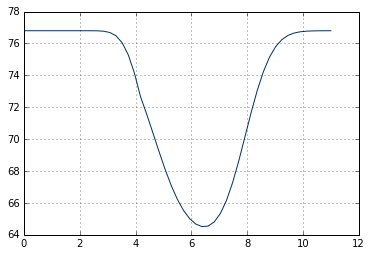

In [121]:
V = Vmax*(1 - rho/rhomax)
pyplot.plot(x, V, color='#003366')
pyplot.grid(True)

In [122]:
c = numpy.mean(V)
c

73.051463068284775

In [123]:
def average(V, total = 0.0):
    num = 0
    for i in V:
        total += i
        num += 1
    return total/num

In [124]:
average(V)

73.051463068284804